# Extrapolation of Galileo's Experiment
By: Hussein Kasim


The following small project was done as an Assignment for the Scientific Programming with Python course taken at Hochschule Bonn-Rhein-Sieg with Prof. Karl Kirschner.


---




**Goal**: The goal of this assignment is to use your knowledge about SciPy [1], Matplotlib [2], and explore the ability to interpolate and extrapolate data. All scientific coding ideas and concepts learned in the course to date should be considered in developing the solution, unless otherwise stated (e.g., allowed libraries, significant figures).


**Problem and Input Data**: Galileo is considered as the father of scientific experimentation. In 1608, Galileo worked on preliminary data for the mnotion of a falling ball that is also moving horizontally. The data and experiment from Galileo's notebook (Figure 1), with a more clear illustration shown in Figure 2. The experiment placed a ball at different heights on an incline, was released, and then went airborne to land at a horizontal distance that was then measured. The independent variable (e.g., x-axis) was the ball "initial height", while the dependent variable (e.g., the y-axis was the "horizontal distance" that the ball landed). All data were measured in units of Galileo's "points.

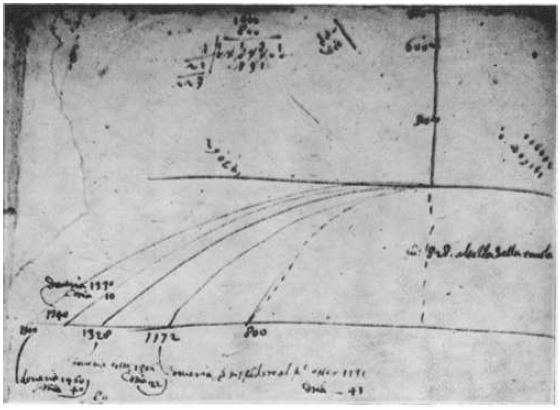

Figure 1. A page from Galileo's notebook for measurements of how far a ball travels horizontally after rolling down an incline. Units are in "points". Source: Reference [3].

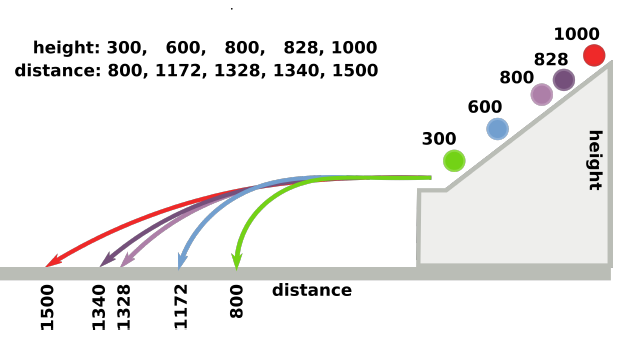

Figure 2. An illustration of Galileo's experiment. Units are in "points". Original concept for this figure came from Reference [4].

From Galileo's experiments (whose data is shown in Figure 2) and his original formulations, one can obtain the following equation to predict how far horizontally a ball travels when dropped from a certain height:

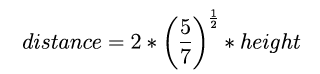

where distance is the ball's horizontal landing distance and height is the ball's initial height. This equation represents Galileo's perspective on the problem at that time, with a few minor adjustments made [5].

A modern perspective obtained through a polynomial curve fitting, suggest the following quadratic equation to predict the horizontal landing distance:

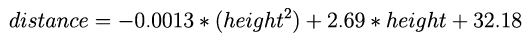

Allowed Python3 [6,7] functions & libraries/modules:
-all built-in functions
-Matplotlin [2] and SciPy [1]
-Typing (optional)



---



# Task 1: User-Defined Functions

Equation 1 must be implemented in a user-defined function.

In [ ]:
def equation_1(height):
  return 2 * 5/6 ** 1/2 * height

Equation 2 must be implemented as a user-defined function too.

In [ ]:
def equation_2(height):
  return -0.0013 * height**2 + 2.69 * height + 32.18



---



# Task 2: Root Mean Square (RMSE)

Calculate the Root Mean Square (RMSE) of equation 1 and equation 2 using an updated version of the rmse_numpy_function() function used in Assignment 5.

1. Galileo's five experimental measurements versus the corresponding values by Equation 1.

In [ ]:
import numpy as np

experimental_measurements = np.array([800, 1172, 1328, 1340, 1500])
heights = [300, 600, 800, 828, 1000]

def rmse_numpy_function(heights, experimental_measurements):
  predicted_values = [equation_1(h) for h in heights]
  squared_errors = ((experimental_measurements - predicted_values)**2)
  rmse = np.sqrt(np.mean(squared_errors))
  return rmse

rmse_equation_1 = rmse_numpy_function(heights, experimental_measurements)
print("RMSE for equation 1: ", rmse_equation_1)

RMSE for equation 1:  641.6214183180331


2. Galileo's five experimental measurements versus the corresponding values by Equation 2.

In [ ]:
import numpy as np

experimental_measurements = np.array([800, 1172, 1328, 1340, 1500])
heights = [300, 600, 800, 828, 1000]

def rmse_numpy_function(heights, experimental_measurements):
  predicted_values = [equation_2(h) for h in heights]
  squared_errors = ((experimental_measurements - predicted_values)**2)
  rmse = np.sqrt(np.mean(squared_errors))
  return rmse

rmse_equation_2 = rmse_numpy_function(heights, experimental_measurements)
print("RMSE for equation 2: ", rmse_equation_2)

RMSE for equation 2:  52.0236722745329




---



# Task 3: Interpolate and Extrapolate Data

Using SciPy's "interp1d" function, we can interpolate the data.

In [ ]:
from scipy.interpolate import interp1d

current_heights = [300, 600, 800, 828, 1000]
current_distances = np.array([800, 1172, 1328, 1340, 1500])


For Linear Extrapolations:

In [ ]:
interpolate_data_linear = interp1d(current_heights, current_distances, kind='linear', fill_value='extrapolate')

new_heights_linear = np.linspace(0,1000,1000)

interpolated_distances_linear = interpolate_data_linear(new_heights_linear)

For Quadratic Extrapolations:

In [ ]:
interpolate_data_quadratic = interp1d(current_heights, current_distances, kind='quadratic', fill_value='extrapolate')

new_heights_quadratic = np.linspace(0,1000,1000)

interpolated_distances_quadratic = interpolate_data_quadratic(new_heights_quadratic)

For Cubic Extrapolations:

In [ ]:
interpolate_data_cubic = interp1d(current_heights, current_distances, kind='cubic', fill_value='extrapolate')

new_heights_cubic = np.linspace(0,1000,1000)

interpolated_distances_cubic = interpolate_data_cubic(new_heights_cubic)

For Nearest Extrapolations:

In [ ]:
interpolate_data_nearest = interp1d(current_heights, current_distances, kind='nearest', fill_value='extrapolate')

new_heights_nearest = np.linspace(0,1000,1000)

interpolated_distances_nearest = interpolate_data_nearest(new_heights_nearest)

For Previous Extrapolations:

In [ ]:
interpolate_data_previous = interp1d(current_heights, current_distances, kind='previous', fill_value='extrapolate')

new_heights_previous = np.linspace(0,1000,1000)

interpolated_distances_previous = interpolate_data_previous(new_heights_previous)

For Next Extrapolations:

In [ ]:
interpolate_data_next = interp1d(current_heights, current_distances, kind='next', fill_value='extrapolate')

new_heights_next = np.linspace(0,1000,1000)

interpolated_distances_next = interpolate_data_next(new_heights_next)



---



# Task 4: Visualization and Compare

1. Plot Galileo's experimentally measured data and the data given by Equations 1 and 2:

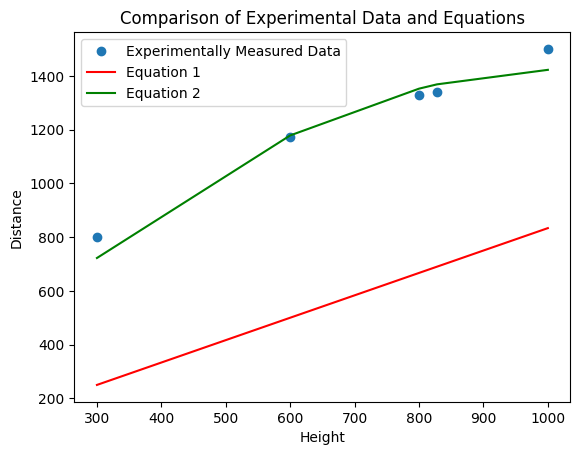

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("Height")
plt.ylabel("Distance")
plt.title("Comparison of Experimental Data and Equations")

plt.plot(heights, experimental_measurements, 'o', label="Experimentally Measured Data")
plt.plot(heights, [equation_1(h) for h in heights], 'r-', label="Equation 1")
plt.plot(heights, [equation_2(h) for h in heights], 'g-', label="Equation 2")

plt.legend()
plt.show()

2. Plot Galileo's experimentally measured data and the new data from Task 3:

Linear Extrapolation:

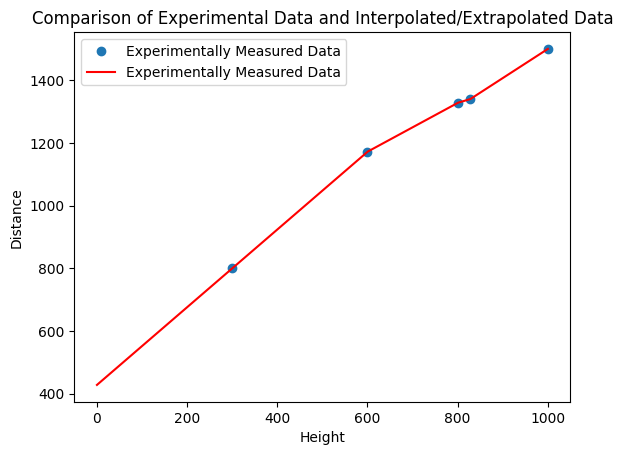

In [ ]:
plt.xlabel("Height")
plt.ylabel("Distance")
plt.title("Comparison of Experimental Data and Interpolated/Extrapolated Data")

plt.plot(heights, experimental_measurements, 'o', label="Experimentally Measured Data")
plt.plot(new_heights_linear, interpolated_distances_linear, 'r-', label="Experimentally Measured Data")

plt.legend()
plt.show()


Quadratic Extrapolation:

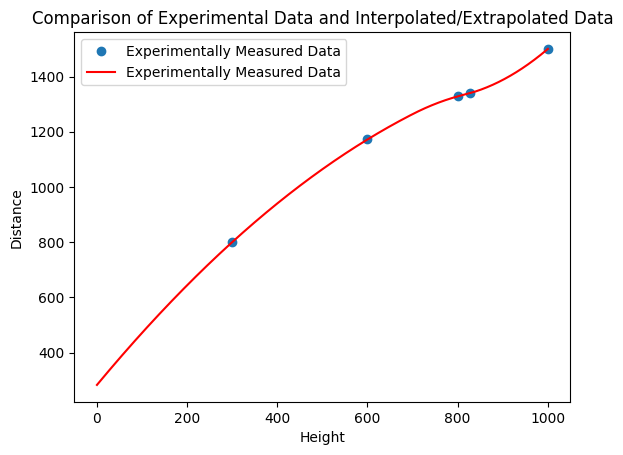

In [ ]:
plt.xlabel("Height")
plt.ylabel("Distance")
plt.title("Comparison of Experimental Data and Interpolated/Extrapolated Data")

plt.plot(heights, experimental_measurements, 'o', label="Experimentally Measured Data")
plt.plot(new_heights_quadratic, interpolated_distances_quadratic, 'r-', label="Experimentally Measured Data")

plt.legend()
plt.show()

Cubic Extrapolation:

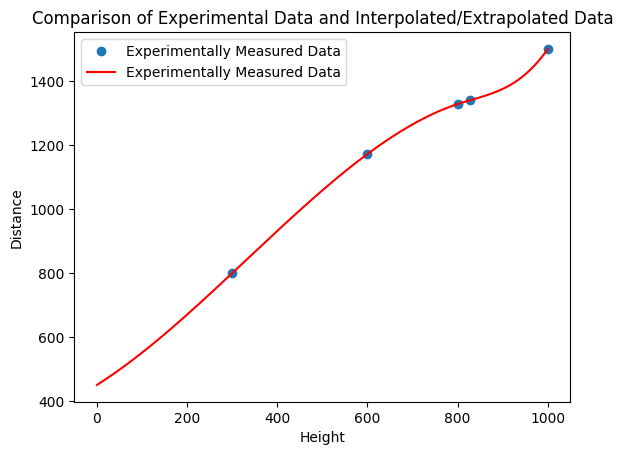

In [ ]:
plt.xlabel("Height")
plt.ylabel("Distance")
plt.title("Comparison of Experimental Data and Interpolated/Extrapolated Data")

plt.plot(heights, experimental_measurements, 'o', label="Experimentally Measured Data")
plt.plot(new_heights_cubic, interpolated_distances_cubic, 'r-', label="Experimentally Measured Data")

plt.legend()
plt.show()

Nearest Extrapolation:

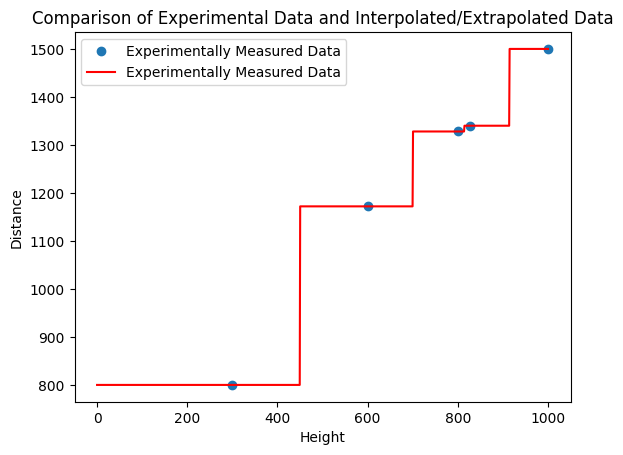

In [ ]:
plt.xlabel("Height")
plt.ylabel("Distance")
plt.title("Comparison of Experimental Data and Interpolated/Extrapolated Data")

plt.plot(heights, experimental_measurements, 'o', label="Experimentally Measured Data")
plt.plot(new_heights_nearest, interpolated_distances_nearest, 'r-', label="Experimentally Measured Data")

plt.legend()
plt.show()

Previous Extrapolation:

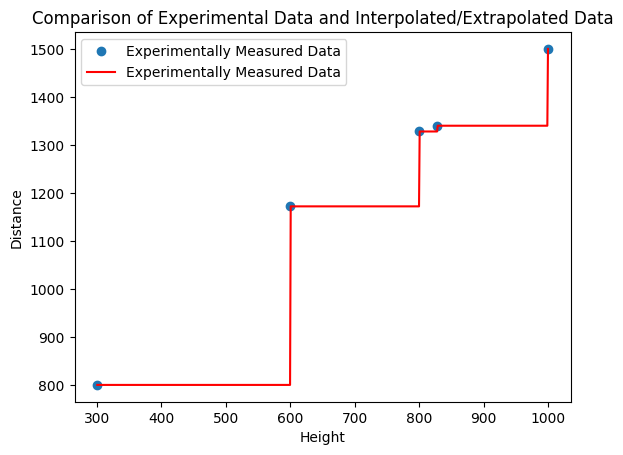

In [ ]:
plt.xlabel("Height")
plt.ylabel("Distance")
plt.title("Comparison of Experimental Data and Interpolated/Extrapolated Data")

plt.plot(heights, experimental_measurements, 'o', label="Experimentally Measured Data")
plt.plot(new_heights_previous, interpolated_distances_previous, 'r-', label="Experimentally Measured Data")

plt.legend()
plt.show()

Next Extrapolation:

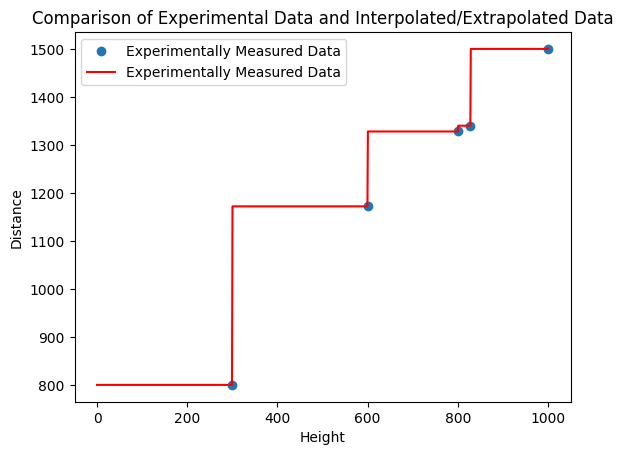

In [ ]:
plt.xlabel("Height")
plt.ylabel("Distance")
plt.title("Comparison of Experimental Data and Interpolated/Extrapolated Data")

plt.plot(heights, experimental_measurements, 'o', label="Experimentally Measured Data")
plt.plot(new_heights_next, interpolated_distances_next, 'r-', label="Experimentally Measured Data")

plt.legend()
plt.show()

3. Comments on observations made.

Equation 2's results were much closer to the experimentally measured data than Equation 1's results, indicating that the modern perspective is much more accurate.

Linear, Quadratic, and Cubic Extrapolation graphs are all very similar, especially Quadratic and Cubic.

Nearest, Previous, and Next Extrapolation graphs are all very similar, especially Previous and Next.



---



# References

[1] Virtanen, P., Gommers, R., Oliphant, T.E.  et al. & SciPy 1.0 Contributors, SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python Nature Methods, 2020, 17, 261-272.

[2] Hunter, J.D., Matplotlib: A 2D graphics environment, IEEE Annals of the History of Computing, 9, 2007, 90-95.

[3] Drake, S., Galileo's experimental confirmation of horizontal intertia: unpublished manuscripts (Galileo gleanings XXII). Isis, 64(3), 1973, 291-305.

[4] Jefferys, W.H., J.O. Berger. "Ockham's razor and Bayesian analysis." American Scientist 80(1), 1992, 64-72.

[5] Crawdord, F.S., Rolling and slipping down Galileo's inclined plane: Rhythms of the spheres. American Journal of Physics, 64(5), 1996, 541-546.

[6] Python Software Foundation. Python Language Reference, version 3.8. Available at http://www.python.org.

[7] van Rossum, G. Python tutorial, Technical Report CS-R9526, Centrum voor Wiskunde en Informatica (CWI), Amsterdam, 1995.